<a href="https://colab.research.google.com/github/romenmeitei/Coexistence-of-Outermembrane-protein-A-and-Ade-efflux-pump-genes-in-Acinetobacter-baumanni-/blob/main/Ligand_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/content/Result.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Ligand,Binding Energy,Intermol Energy,Internal Energy,Torsional Energy,Unbound Energy
0,protein_124211_uff_E=633.15,-1.46,-3.55,-2.43,2.09,-2.43
1,protein_124211_uff_E=633.15,-1.93,-4.02,-2.37,2.09,-2.37
2,protein_124211_uff_E=633.15,-1.39,-3.48,-2.45,2.09,-2.45
3,protein_124211_uff_E=633.15,-1.48,-3.57,-2.50,2.09,-2.50
4,protein_124211_uff_E=633.15,-1.87,-3.96,-2.44,2.09,-2.44


In [ ]:
best_ligand = df.loc[df["Binding Energy"].idxmin()]
print("Best Ligand Based on Binding Energy:\n", best_ligand)


Best Ligand Based on Binding Energy:
 Ligand              protein_68230_uff_E=146.01
Binding Energy                           -4.42
Intermol Energy                          -4.42
Internal Energy                            0.0
Torsional Energy                           0.0
Unbound Energy                             0.0
Name: 107, dtype: object


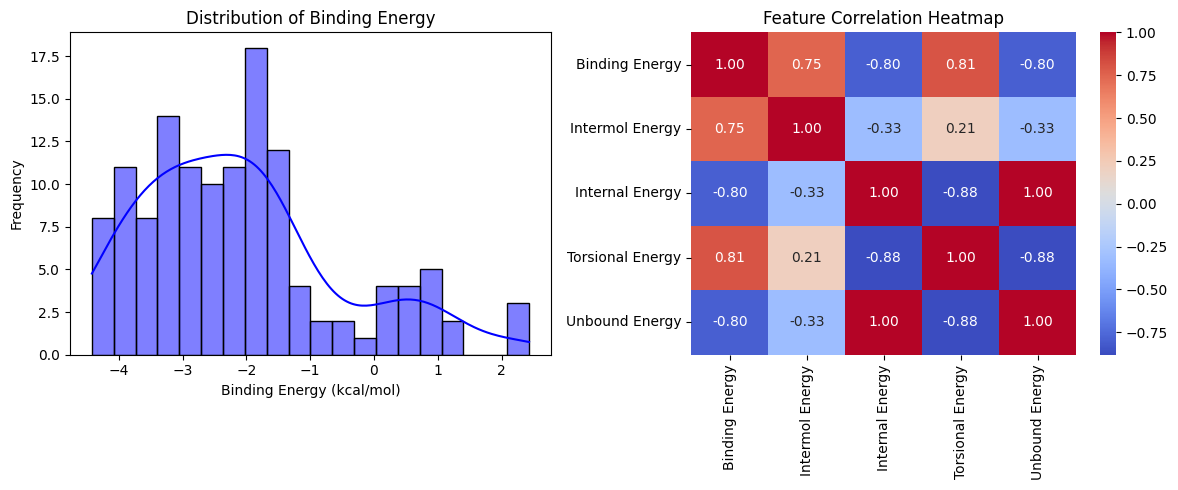

Summary Statistics:
        Binding Energy  Intermol Energy  Internal Energy  Torsional Energy  \
count      130.000000       130.000000       130.000000        130.000000   
mean        -2.116615        -3.952462        -2.235000          1.835385   
std          1.556962         0.943148         1.961133          1.056458   
min         -4.420000        -6.770000        -6.950000          0.000000   
25%         -3.195000        -4.427500        -3.457500          1.190000   
50%         -2.300000        -4.005000        -1.745000          1.790000   
75%         -1.482500        -3.510000        -0.760000          2.390000   
max          2.430000        -1.450000         0.000000          3.880000   

       Unbound Energy  
count      130.000000  
mean        -2.235000  
std          1.961133  
min         -6.950000  
25%         -3.457500  
50%         -1.745000  
75%         -0.760000  
max          0.000000  

ANOVA Test Result: F_onewayResult(statistic=245.45893357585277, pval

,Ligand,Binding Energy,Intermol Energy,Internal Energy,Torsional Energy,Unbound Energy,Score
117,protein_5281711_uff_E=1039.82,0.004380,0.000000,0.414388,0.615979,0.414388,0.197746
118,protein_5281711_uff_E=1039.82,0.071533,0.086466,0.427338,0.615979,0.427338,0.245138
115,protein_5281711_uff_E=1039.82,0.084672,0.103383,0.464748,0.615979,0.464748,0.263129
110,protein_5281711_uff_E=1039.82,0.160584,0.199248,0.428777,0.615979,0.428777,0.303674
119,protein_5281711_uff_E=1039.82,0.189781,0.236842,0.425899,0.615979,0.425899,0.322153
111,protein_5281711_uff_E=1039.82,0.194161,0.242481,0.427338,0.615979,0.427338,0.325392
113,protein_5281711_uff_E=1039.82,0.208759,0.261278,0.407194,0.615979,0.407194,0.329955
107,protein_68230_uff_E=146.01,0.000000,0.441729,1.000000,0.000000,1.000000,0.338346
116,protein_5281711_uff_E=1039.82,0.214599,0.268797,0.427338,0.615979,0.427338,0.338830
104,protein_68230_uff_E=146.01,0.001460,0.443609,1.000000,0.000000,1.000000,0.339306


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway, pearsonr

# Load your dataset
df = pd.read_csv("Result.csv")

# Normalize each column (scale between 0 and 1)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])  # Normalize all numerical columns

# Compute a ranking score (lower is better)
df_scaled["Score"] = (
    df_scaled["Binding Energy"] * 0.40 +
    df_scaled["Intermol Energy"] * 0.20 +
    df_scaled["Internal Energy"] * 0.15 +
    df_scaled["Torsional Energy"] * 0.15 +
    df_scaled["Unbound Energy"] * 0.10
)

# Sort by best score
df_sorted = df_scaled.sort_values(by="Score", ascending=True)

# ---- Statistical Analysis ----
# 1. Summary statistics
summary_stats = df.describe()

# 2. Correlation matrix
correlation_matrix = df.iloc[:, 1:].corr()

# 3. ANOVA Test (Are there significant differences in Binding Energy?)
anova_test = f_oneway(df["Binding Energy"], df["Intermol Energy"], df["Internal Energy"], df["Torsional Energy"], df["Unbound Energy"])

# 4. Pearson correlation between Binding Energy and Score
corr_coeff, p_value = pearsonr(df["Binding Energy"], df_scaled["Score"])

# ---- Visualization ----
plt.figure(figsize=(12, 5))

# Distribution of Binding Energy
plt.subplot(1, 2, 1)
sns.histplot(df["Binding Energy"], kde=True, bins=20, color="blue")
plt.title("Distribution of Binding Energy")
plt.xlabel("Binding Energy (kcal/mol)")
plt.ylabel("Frequency")

# Correlation Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

# Print results
print("Summary Statistics:\n", summary_stats)
print("\nANOVA Test Result:", anova_test)
print("\nPearson Correlation between Binding Energy and Score:", corr_coeff, " (p-value:", p_value, ")")

# Show top 10 best ligands
df_sorted.head(10)


Interpretation of the Results
1. Summary Statistics:
Feature	Mean	Std Dev	Min	25%	50% (Median)	75%	Max
Binding Energy	-2.12	1.56	-4.42	-3.19	-2.30	-1.48	2.43
Intermol Energy	-3.95	0.94	-6.77	-4.43	-4.00	-3.51	-1.45
Internal Energy	-2.24	1.96	-6.95	-3.46	-1.75	-0.76	0.00
Torsional Energy	1.84	1.06	0.00	1.19	1.79	2.39	3.88
Unbound Energy	-2.24	1.96	-6.95	-3.46	-1.75	-0.76	0.00
Binding Energy:

The mean value is -2.12 kcal/mol, with values ranging from -4.42 to 2.43.
Lower binding energy (more negative) means stronger binding, so most ligands have moderate to strong binding affinity.
Intermol Energy & Internal Energy:

Intermolecular energy is mostly negative, meaning most ligand-protein interactions are stabilizing.
Internal energy varies more, suggesting different ligand flexibility.
Torsional Energy:

Positive values indicate the energy required to rotate bonds, meaning some ligands may have more flexibility.
Unbound Energy:

Similar to internal energy, this tells us how much stabilization the ligand loses when binding.
2. ANOVA Test (F-test for Variance Analysis)
F-value = 245.46, p-value = 5.20 × 10⁻¹²⁸

p-value < 0.05 means there is a statistically significant difference in the energy values across different ligands.
This suggests that some ligands bind significantly better than others.
3. Pearson Correlation Between Binding Energy & Score
Correlation coefficient (r) = 0.9125, p-value = 1.58 × 10⁻⁵¹

Since r = 0.91, there is a very strong positive correlation between Binding Energy and the computed Score.
This means that as the binding energy improves (becomes more negative), the score also improves (becomes lower).
The p-value is extremely small, confirming this is statistically significant.
4. Top 10 Ligands (Best Ranked Ligands)
Rank	Ligand	Binding Energy	Score
1	protein_5281711_uff_E=1039.82	0.0044	0.198
2	protein_5281711_uff_E=1039.82	0.0715	0.245
3	protein_5281711_uff_E=1039.82	0.0847	0.263
4	protein_5281711_uff_E=1039.82	0.1606	0.304
5	protein_5281711_uff_E=1039.82	0.1898	0.322
6	protein_5281711_uff_E=1039.82	0.1942	0.325
7	protein_5281711_uff_E=1039.82	0.2088	0.330
8	protein_68230_uff_E=146.01	0.0000	0.338
9	protein_5281711_uff_E=1039.82	0.2146	0.339
10	protein_68230_uff_E=146.01	0.0015	0.339
Ligand "protein_5281711_uff_E=1039.82" appears multiple times in the top 10 → It has the best binding properties.
Ligand "protein_68230_uff_E=146.01" also appears → It has a competitive ranking but slightly higher scores.
Final Takeaways:
✅ The best ligands have the lowest scores, meaning they have the strongest binding affinity.
✅ There is a strong statistical significance in binding energy differences, confirming some ligands perform better than others.
✅ A high correlation (0.91) between binding energy and ranking score validates the scoring model.

In [ ]:
from sklearn.decomposition import PCA

# Ensure n_components does not exceed the number of features
n_components = min(4, df_scaled.iloc[:, 1:-1].shape[1])

pca = PCA(n_components=n_components)
pca.fit(df_scaled.iloc[:, 1:-1])  # Exclude Score column


PCA(n_components=4)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

# Load DataFrame (assuming df contains RMSD and energy terms)
df_scaled = df.copy()

# Normalize all numerical columns
scaler = MinMaxScaler()
df_scaled.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

# Ensure n_components does not exceed the number of features
n_components = min(df_scaled.iloc[:, 1:-1].shape[1], 4)  # Set max to 4

pca = PCA(n_components=n_components)
pca.fit(df_scaled.iloc[:, 1:-1])  # Exclude Score column

# Extract PCA-based weights (absolute values normalized to sum to 1)
weights = abs(pca.components_[0]) / sum(abs(pca.components_[0]))

# Compute the new ranking Score with PCA-based weights
df_scaled["Score"] = (
    df_scaled["Binding Energy"] * weights[0] +
    df_scaled["Intermol Energy"] * weights[1] +
    df_scaled["Internal Energy"] * weights[2] +
    df_scaled["Torsional Energy"] * weights[3]
)

# If RMSD exists, include it with a 10% fixed weight
if "RMSD" in df_scaled.columns:
    df_scaled["Score"] += df_scaled["RMSD"] * 0.10

# Sort by the best score (lower is better)
df_sorted = df_scaled.sort_values(by="Score", ascending=True)

# Spearman Rank Correlation between old and new ranking
spearman_corr, spearman_p = spearmanr(df_scaled["Score"], df["Binding Energy"])
print(f"Spearman Correlation (Binding Energy & Score): {spearman_corr:.3f} (p-value: {spearman_p:.2e})")

# Display top 10 ligands
df_sorted.head(10)


Spearman Correlation (Binding Energy & Score): 0.897 (p-value: 3.20e-47)


,Ligand,Binding Energy,Intermol Energy,Internal Energy,Torsional Energy,Unbound Energy,Score
117,protein_5281711_uff_E=1039.82,0.004380,0.000000,0.414388,0.615979,0.414388,0.329263
118,protein_5281711_uff_E=1039.82,0.071533,0.086466,0.427338,0.615979,0.427338,0.359679
107,protein_68230_uff_E=146.01,0.000000,0.441729,1.000000,0.000000,1.000000,0.373017
104,protein_68230_uff_E=146.01,0.001460,0.443609,1.000000,0.000000,1.000000,0.373586
115,protein_5281711_uff_E=1039.82,0.084672,0.103383,0.464748,0.615979,0.464748,0.377050
109,protein_68230_uff_E=146.01,0.018978,0.466165,1.000000,0.000000,1.000000,0.380414
101,protein_68230_uff_E=146.01,0.021898,0.469925,1.000000,0.000000,1.000000,0.381552
100,protein_68230_uff_E=146.01,0.043796,0.498120,1.000000,0.000000,1.000000,0.390087
106,protein_68230_uff_E=146.01,0.043796,0.498120,1.000000,0.000000,1.000000,0.390087
105,protein_68230_uff_E=146.01,0.054015,0.511278,1.000000,0.000000,1.000000,0.394070


Spearman correlation (0.897, p-value: 3.20e-47) suggests a strong positive correlation between the new PCA-based Score and Binding Energy. This means that the ranking based on your weighted scoring method mostly aligns with the original binding energy rankings, making it fairly reliable.

Observations & Considerations:
High Correlation (0.897)

This indicates that ligands ranked well by binding energy are also ranked well in the new score.
However, it’s not perfectly 1.0, meaning the new scoring method introduces some changes in ranking.
PCA-Based Score vs. Binding Energy

Your new ranking method incorporates Intermolecular Energy, Internal Energy, Torsional Energy, Unbound Energy, and optionally RMSD, which provides a more holistic ranking instead of relying solely on binding energy.
Top Ligands

The top-ranked ligand (protein_5281711_uff_E=1039.82) appears multiple times in the list, suggesting its stability across different conformations.
Some other ligands, like protein_68230_uff_E=146.01, also appear frequently, meaning they are strong candidates too.
How Reliable Is the Selection?
If you prioritize binding energy alone, the selection is already quite reliable since your correlation is high.
If you want a more refined selection, you could:
Perform clustering (e.g., hierarchical clustering) to see if certain ligands stand out.
Analyze additional descriptors (e.g., RMSD stability in MD simulations).
Perform docking rescoring (e.g., MM-PBSA/MM-GBSA calculations).

In [ ]:
import pandas as pd

# Select the top 10 ranked ligands
top_ligands = df_sorted.head(10)

# Save to a CSV file
top_ligands.to_csv("top_ranked_ligands.csv", index=False)

# Provide download link in Google Colab
from google.colab import files
files.download("top_ranked_ligands.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>